SIN-392 - Introdução ao Processamento Digital de Imagens (2023-1)

# Aula 16 - Redes neurais artificiais

Prof. João Fernando Mari ([*joaofmari.github.io*](https://joaofmari.github.io/))

---

## Importando as bibliotecas
---

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets, metrics, preprocessing, model_selection

### %matplotlib notebook

## Plots the decision surface
---

In [2]:
def decision_surface(X, y, w, b, str_title):
    """
    Plots the decision surface for the current epoch
    """

    # Defines the extreme points of the decision surface line segment.
    # p0 = (x0_min, f_x0_min); p1 = (x0_max, f_x0_max)
    # ----------
    x0_min = X.min() - 1.
    x0_max = X.max() + 1.
    # ----------
    f_x0_min = -(w[0] / w[1]) * x0_min - (b / w[1])
    f_x0_max = -(w[0] / w[1]) * x0_max - (b / w[1])

    colors = ['r', 'g', 'b', 'y', 'c', 'm']

    plt.figure()
    # Plots the trainning set
    for y_ in np.unique(y):
        plt.scatter(X[y==y_][:,0], X[y==y_][:,1], color=colors[y_], label=str(y_))

    # Labels, legends and title 
    plt.xlabel('$x_0$')
    plt.ylabel('$x_1$')
    plt.legend()
    plt.title(str_title)

    # Set the limits of the visualization space.
    plt.xlim(X.min()-.5, X.max()+.5)
    plt.ylim(X.min()-.5, X.max()+.5)

    # Plots the surface decision.
    plt.plot([x0_min, x0_max], [f_x0_min, f_x0_max], color='b')

    # Show de figure.
    plt.show()

## Perceptron learning algorithm
---

In [3]:
def fit(X, y, plot=True):
    """
    Train the model.
    """
    print('Iniciatialization')
    print('====================')
    
    # Weights (w) initialization
    w = np.random.rand(X.shape[1]) 
    print(f'\nWeights: {w}')

    # Bias (b) initialization
    b = np.random.rand() 
    print(f'Bias: {b}')

    # List with the epoch errors
    erros_epocas = []

    # Plot the decision surface
    if plot:
        decision_surface(X, y, w, b, 'Inicialização')

    # Iterates along the training epochs
    for i in range(max_iter):
        print('\nÉpoca %i' % i)
        print('====================')

        # Epoch error
        erro_epoca = 0

        # Iterates across the dataset samples
        for j in range(X.shape[0]):
            print('\nIteração %i' % j)
            print('--------------------')
            print(f'x: {X[j,:]}, y: {y[j]}')

            # v: Inne product
            v = np.dot(X[j,:], w) + b
            print(f'v: {v}')

            # y^: Step activation function.
            y_out = np.where(v >= 0., 1, 0)
            print(f'y_out: {y_out}')

            # Error
            erro = y[j] - y_out
            print(f'Erro: {erro}')

            # Update the epoch error. Squared error.
            erro_epoca = erro_epoca + erro**2

            # Weights (w) update
            w = w +  learning_rate * np.dot(erro, X[j,:])
            print(f'Pesos: {w}')

            # Bias (b) update
            b = b +  learning_rate * erro.sum()
            print(f'Bias: {b}')

        # Epoch error (mean squared error).
        erro_epoca = erro_epoca / 2.
        print('--------------------')
        print(f'\nEpoch error: {erro_epoca}')

        # Append the epoch error to the list.
        erros_epocas.append(erro_epoca)

        # Plot the decision surface
        if plot:
            decision_surface(X, y, w, b, f'Epoch {i}')

        # Stop training if epoch error is less than a pre-determined threshold.
        if np.abs(erro_epoca) <= 0.01:
            break

## Training the model with binary functions
---

In [4]:
# Data
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])

# Binary functions
# ================
# AND
y_and = np.array([0, 0, 0, 1])

# OR
y_or = np.array([0, 1, 1, 1])

# XOR
y_xor = np.array([0, 1, 1, 0])

### AND function

Iniciatialization

Weights: [0.19151945 0.62210877]
Bias: 0.4377277390071145


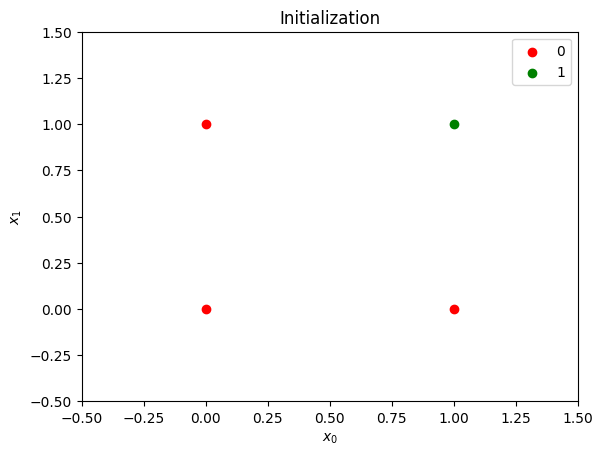


Epoch 0

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.4377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.9598365100469464
y_out: 1
Error: -1
Weights: [0.19151945 0.52210877]
Bias: 0.2377277390071145

Iteration 2
--------------------
x: [1 0], y: 0
v: 0.4292471893860068
y_out: 1
Error: -1
Weights: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.7513559604258386
y_out: 1
Error: 0
Weights: [0.09151945 0.52210877]
Bias: 0.1377277390071145
--------------------

Epoch error: 1.5


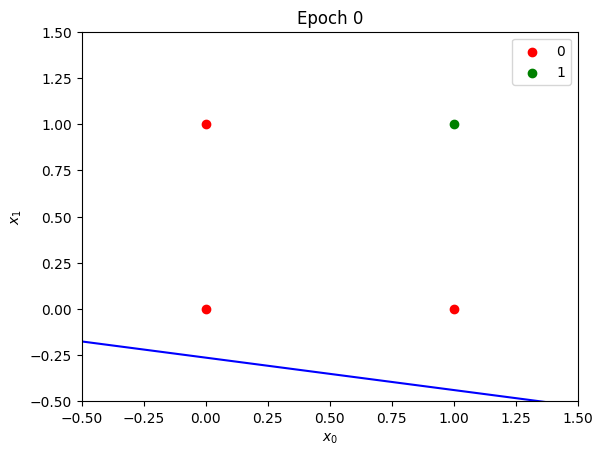


Epoch 1

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.1377277390071145
y_out: 1
Error: -1
Weights: [0.09151945 0.52210877]
Bias: 0.037727739007114486

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.5598365100469463
y_out: 1
Error: -1
Weights: [0.09151945 0.42210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 0
v: 0.02924718938600676
y_out: 1
Error: -1
Weights: [-0.00848055  0.42210877]
Bias: -0.16227226099288553

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.25135596042583863
y_out: 1
Error: 0
Weights: [-0.00848055  0.42210877]
Bias: -0.16227226099288553
--------------------

Epoch error: 1.5


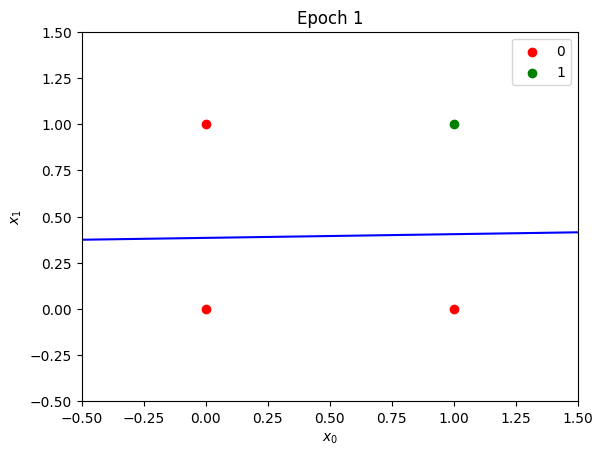


Epoch 2

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.16227226099288553
y_out: 0
Error: 0
Weights: [-0.00848055  0.42210877]
Bias: -0.16227226099288553

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.2598365100469464
y_out: 1
Error: -1
Weights: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteration 2
--------------------
x: [1 0], y: 0
v: -0.27075281061399326
y_out: 0
Error: 0
Weights: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.051355960425838676
y_out: 1
Error: 0
Weights: [-0.00848055  0.32210877]
Bias: -0.26227226099288553
--------------------

Epoch error: 0.5


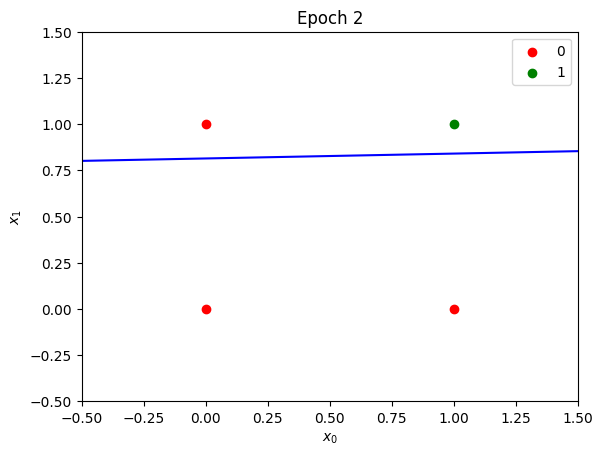


Epoch 3

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.26227226099288553
y_out: 0
Error: 0
Weights: [-0.00848055  0.32210877]
Bias: -0.26227226099288553

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.0598365100469464
y_out: 1
Error: -1
Weights: [-0.00848055  0.22210877]
Bias: -0.36227226099288556

Iteration 2
--------------------
x: [1 0], y: 0
v: -0.3707528106139933
y_out: 0
Error: 0
Weights: [-0.00848055  0.22210877]
Bias: -0.36227226099288556

Iteration 3
--------------------
x: [1 1], y: 1
v: -0.14864403957416136
y_out: 0
Error: 1
Weights: [0.09151945 0.32210877]
Bias: -0.2622722609928856
--------------------

Epoch error: 1.0


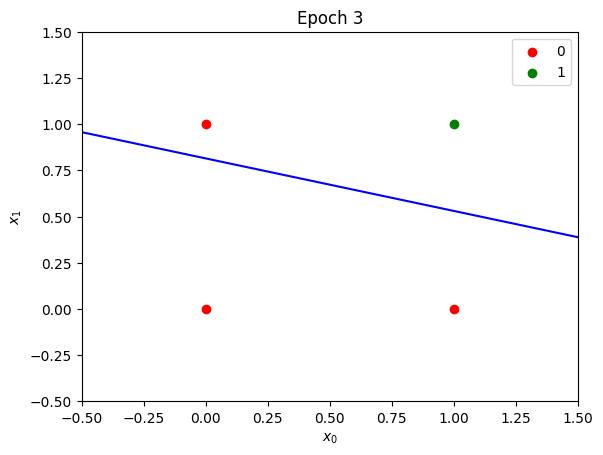


Epoch 4

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.2622722609928856
y_out: 0
Error: 0
Weights: [0.09151945 0.32210877]
Bias: -0.2622722609928856

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.059836510046946345
y_out: 1
Error: -1
Weights: [0.09151945 0.22210877]
Bias: -0.36227226099288556

Iteration 2
--------------------
x: [1 0], y: 0
v: -0.27075281061399326
y_out: 0
Error: 0
Weights: [0.09151945 0.22210877]
Bias: -0.36227226099288556

Iteration 3
--------------------
x: [1 1], y: 1
v: -0.04864403957416136
y_out: 0
Error: 1
Weights: [0.19151945 0.32210877]
Bias: -0.2622722609928856
--------------------

Epoch error: 1.0


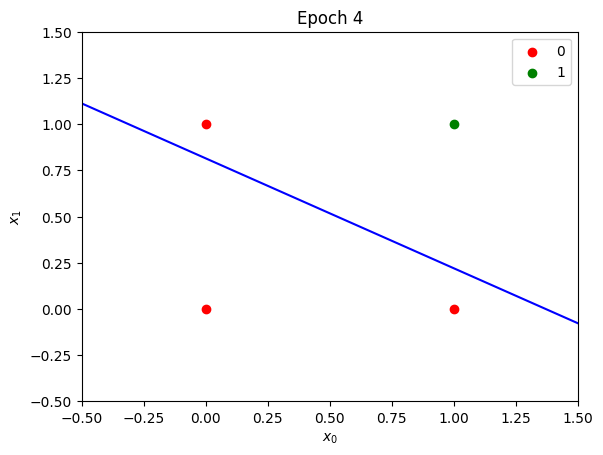


Epoch 5

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.2622722609928856
y_out: 0
Error: 0
Weights: [0.19151945 0.32210877]
Bias: -0.2622722609928856

Iteration 1
--------------------
x: [0 1], y: 0
v: 0.059836510046946345
y_out: 1
Error: -1
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteration 2
--------------------
x: [1 0], y: 0
v: -0.17075281061399328
y_out: 0
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.051355960425838676
y_out: 1
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556
--------------------

Epoch error: 0.5


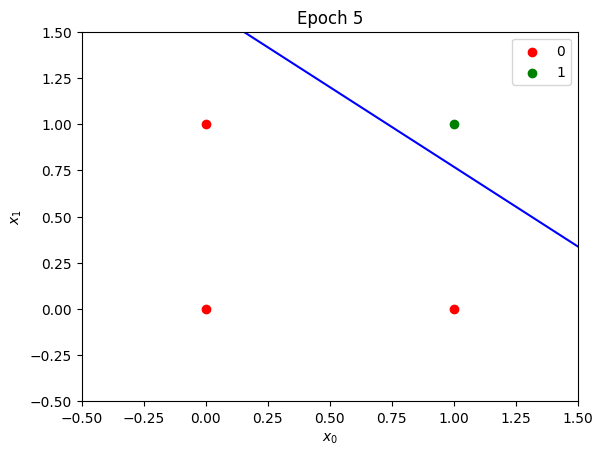


Epoch 6

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.36227226099288556
y_out: 0
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteration 1
--------------------
x: [0 1], y: 0
v: -0.14016348995305364
y_out: 0
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteration 2
--------------------
x: [1 0], y: 0
v: -0.17075281061399328
y_out: 0
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.051355960425838676
y_out: 1
Error: 0
Weights: [0.19151945 0.22210877]
Bias: -0.36227226099288556
--------------------

Epoch error: 0.0


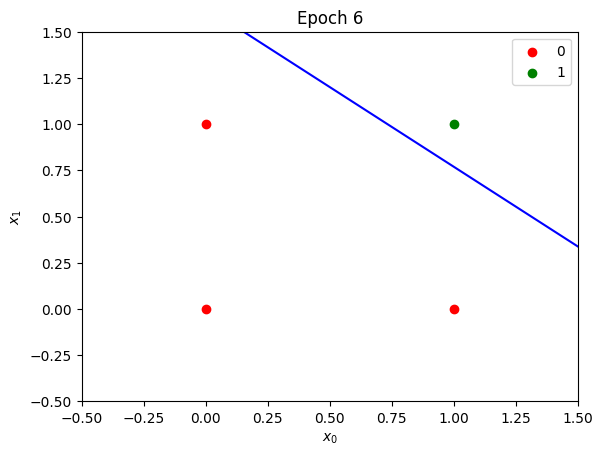

In [5]:
# Maximum number of epochs.
max_iter = 20

# Learning rate.
learning_rate = 0.1

# Sets a value for the random number generation seed.
np.random.seed(1234)

# Training the model
fit(X, y_and)

### OR function

Iniciatialization

Weights: [0.19151945 0.62210877]
Bias: 0.4377277390071145


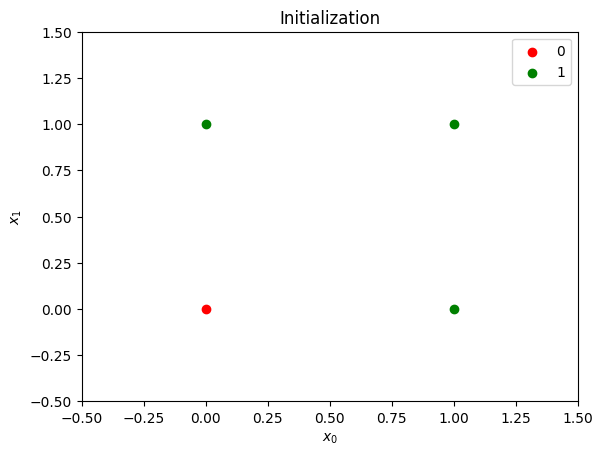


Epoch 0

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.4377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.9598365100469464
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.5292471893860068
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 3
--------------------
x: [1 1], y: 1
v: 1.1513559604258385
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145
--------------------

Epoch error: 0.5


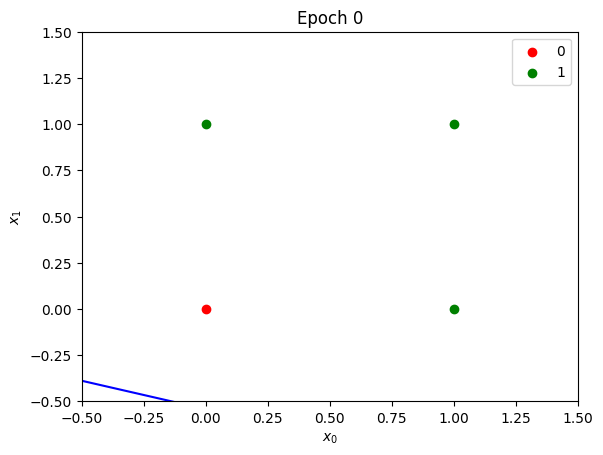


Epoch 1

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.3377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.8598365100469464
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.4292471893860068
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.2377277390071145

Iteration 3
--------------------
x: [1 1], y: 1
v: 1.0513559604258387
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.2377277390071145
--------------------

Epoch error: 0.5


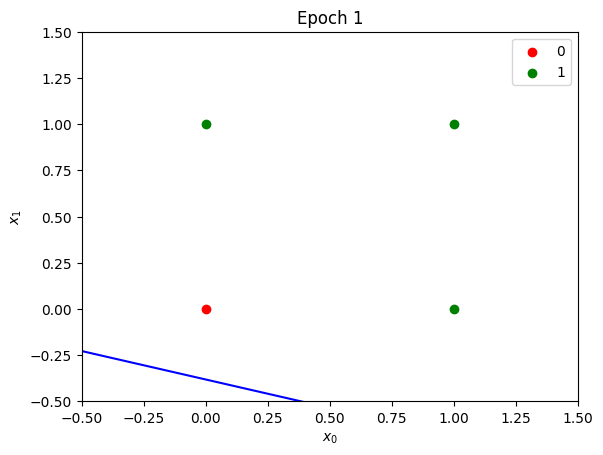


Epoch 2

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.2377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.7598365100469464
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.3292471893860068
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.9513559604258386
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.1377277390071145
--------------------

Epoch error: 0.5


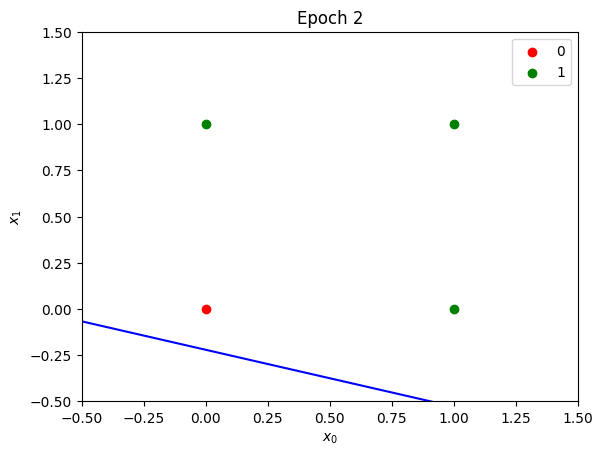


Epoch 3

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.1377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.6598365100469463
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.22924718938600677
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.8513559604258386
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.037727739007114486
--------------------

Epoch error: 0.5


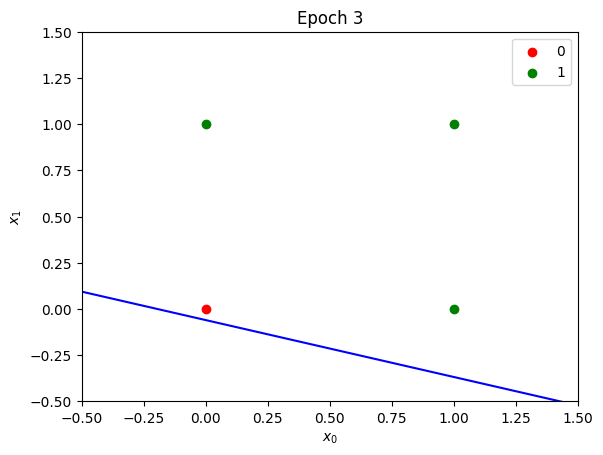


Epoch 4

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.037727739007114486
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.5598365100469463
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.12924718938600677
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.7513559604258386
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 0.5


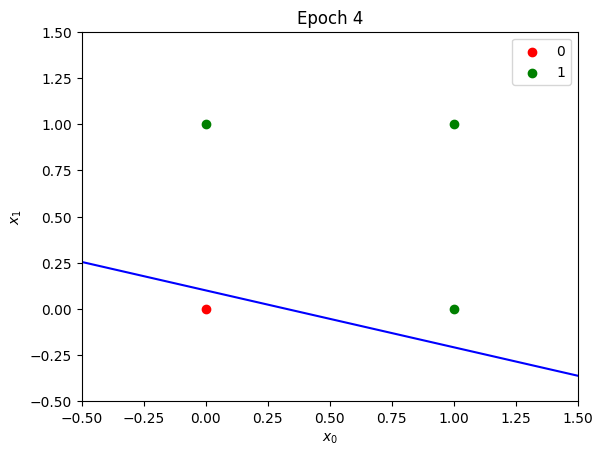


Epoch 5

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.5598365100469463
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.12924718938600677
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552

Iteration 3
--------------------
x: [1 1], y: 1
v: 0.7513559604258386
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 0.0


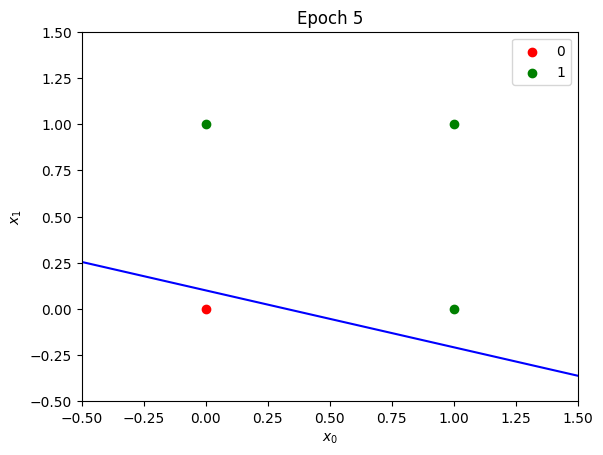

In [6]:
# Maximum number of epochs.
max_iter = 10

# Learning rate
learning_rate = 0.1

# Sets a value for the random number generation seed.
np.random.seed(1234)

# Training the model
fit(X, y_or)

### XOR function

* The XOR function is non-linear, so the Perceptron algorithm does not converge.

Iniciatialization

Weights: [0.19151945 0.62210877]
Bias: 0.4377277390071145


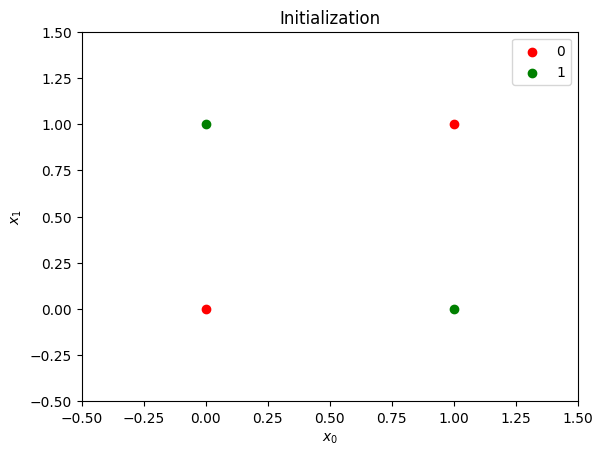


Epoch 0

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.4377277390071145
y_out: 1
Error: -1
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.9598365100469464
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.5292471893860068
y_out: 1
Error: 0
Weights: [0.19151945 0.62210877]
Bias: 0.3377277390071145

Iteration 3
--------------------
x: [1 1], y: 0
v: 1.1513559604258385
y_out: 1
Error: -1
Weights: [0.09151945 0.52210877]
Bias: 0.2377277390071145
--------------------

Epoch error: 1.0


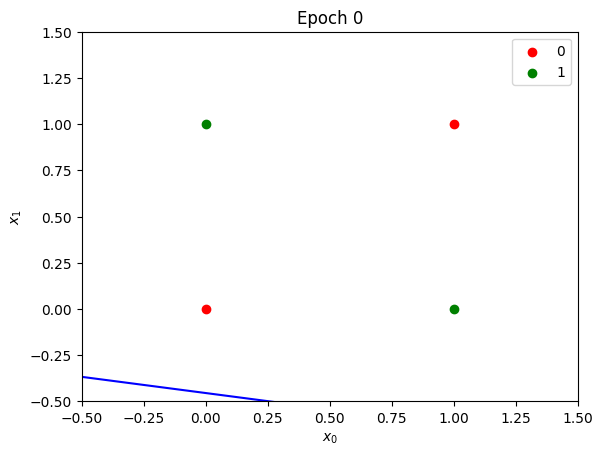


Epoch 1

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.2377277390071145
y_out: 1
Error: -1
Weights: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.6598365100469463
y_out: 1
Error: 0
Weights: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.22924718938600677
y_out: 1
Error: 0
Weights: [0.09151945 0.52210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.7513559604258386
y_out: 1
Error: -1
Weights: [-0.00848055  0.42210877]
Bias: 0.037727739007114486
--------------------

Epoch error: 1.0


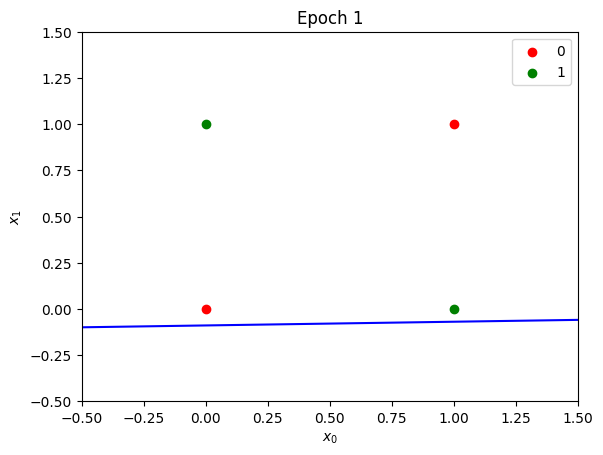


Epoch 2

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.037727739007114486
y_out: 1
Error: -1
Weights: [-0.00848055  0.42210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.3598365100469464
y_out: 1
Error: 0
Weights: [-0.00848055  0.42210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [0.09151945 0.42210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.5513559604258387
y_out: 1
Error: -1
Weights: [-0.00848055  0.32210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 1.5


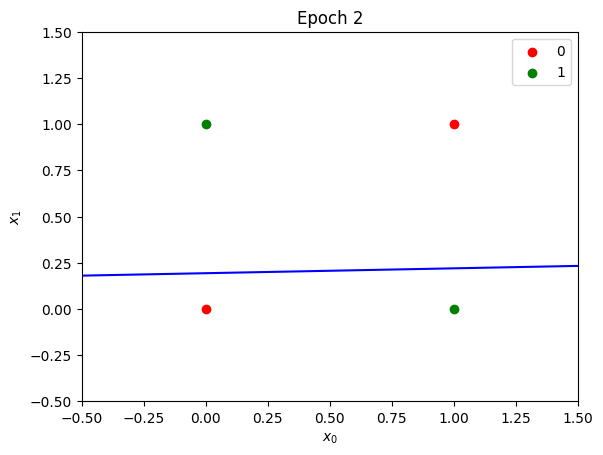


Epoch 3

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [-0.00848055  0.32210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.2598365100469464
y_out: 1
Error: 0
Weights: [-0.00848055  0.32210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [0.09151945 0.32210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.4513559604258387
y_out: 1
Error: -1
Weights: [-0.00848055  0.22210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 1.0


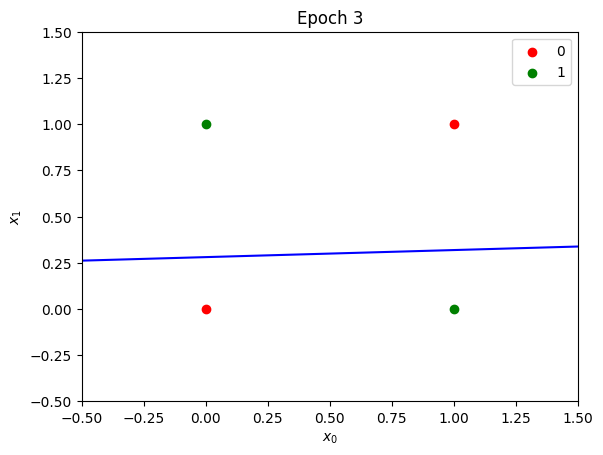


Epoch 4

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [-0.00848055  0.22210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.1598365100469464
y_out: 1
Error: 0
Weights: [-0.00848055  0.22210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [0.09151945 0.22210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.3513559604258387
y_out: 1
Error: -1
Weights: [-0.00848055  0.12210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 1.0


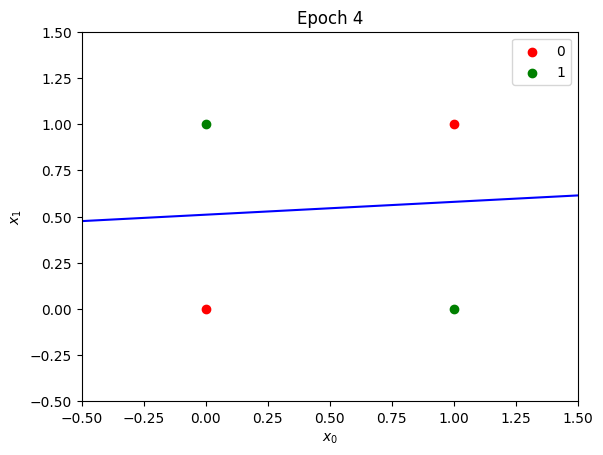


Epoch 5

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [-0.00848055  0.12210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: 0.0598365100469464
y_out: 1
Error: 0
Weights: [-0.00848055  0.12210877]
Bias: -0.06227226099288552

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [0.09151945 0.12210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.2513559604258387
y_out: 1
Error: -1
Weights: [-0.00848055  0.02210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 1.0


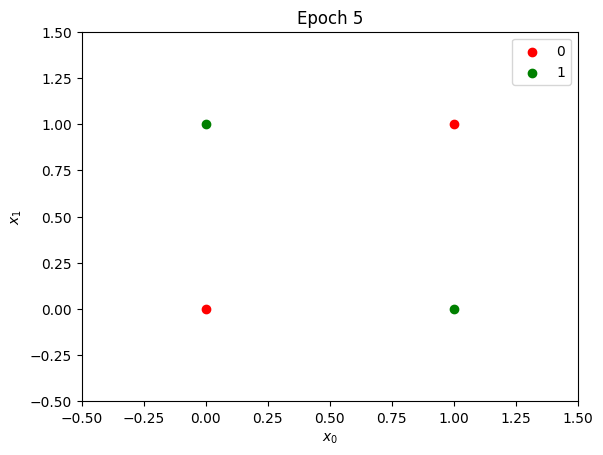


Epoch 6

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [-0.00848055  0.02210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: -0.040163489953053605
y_out: 0
Error: 1
Weights: [-0.00848055  0.12210877]
Bias: 0.037727739007114486

Iteration 2
--------------------
x: [1 0], y: 1
v: 0.02924718938600676
y_out: 1
Error: 0
Weights: [-0.00848055  0.12210877]
Bias: 0.037727739007114486

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.15135596042583868
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: -0.06227226099288552
--------------------

Epoch error: 1.0


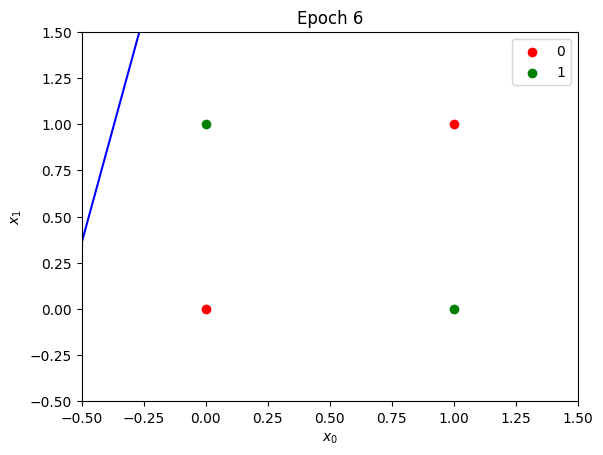


Epoch 7

Iteration 0
--------------------
x: [0 0], y: 0
v: -0.06227226099288552
y_out: 0
Error: 0
Weights: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: -0.040163489953053605
y_out: 0
Error: 1
Weights: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.2513559604258387
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Epoch error: 1.5


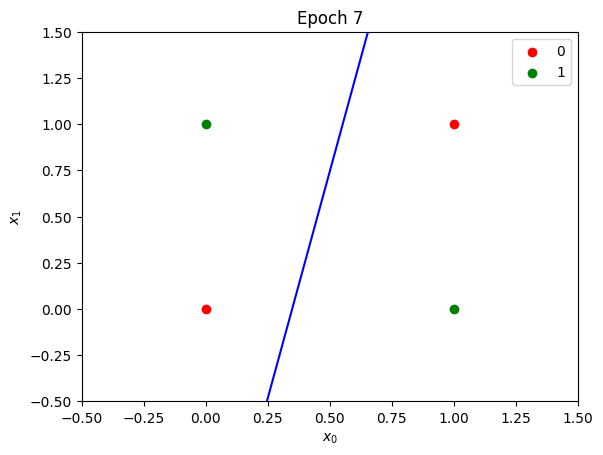


Epoch 8

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.037727739007114486
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: -0.040163489953053605
y_out: 0
Error: 1
Weights: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.2513559604258387
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Epoch error: 2.0


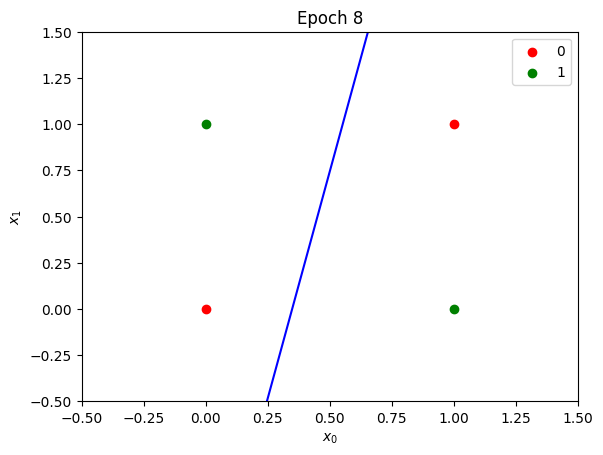


Epoch 9

Iteration 0
--------------------
x: [0 0], y: 0
v: 0.037727739007114486
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: -0.06227226099288552

Iteration 1
--------------------
x: [0 1], y: 1
v: -0.040163489953053605
y_out: 0
Error: 1
Weights: [-0.10848055  0.12210877]
Bias: 0.037727739007114486

Iteration 2
--------------------
x: [1 0], y: 1
v: -0.07075281061399324
y_out: 0
Error: 1
Weights: [-0.00848055  0.12210877]
Bias: 0.1377277390071145

Iteration 3
--------------------
x: [1 1], y: 0
v: 0.2513559604258387
y_out: 1
Error: -1
Weights: [-0.10848055  0.02210877]
Bias: 0.037727739007114486
--------------------

Epoch error: 2.0


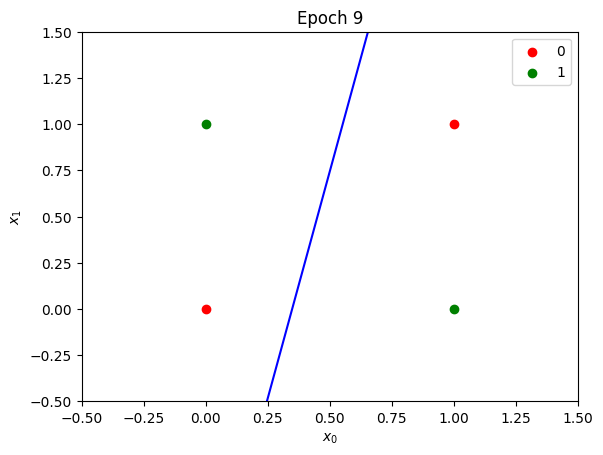

In [7]:
# Maximum number of iterations.
max_iter = 10

# Learning rate.
learning_rate = 0.1

# Sets a value for the random number generation seed.
np.random.seed(1234)

# Perceptron Training
# -------------------
fit(X, y_xor)

## Training the model with the Iris dataset
---

In [8]:
# Loading the IRIS dataset
iris = datasets.load_iris()

# Select only 2 classes: Setosa (0) and Virginica (1).
# Select only 2 attributes: sepal length (0) and sepal width (1).
X = iris.data[iris.target < 2, :2]
y = iris.target[iris.target < 2]

In [9]:
# Split the datase in train (70 %) and test (30 %)
X, X_test, y, y_test = model_selection.train_test_split(X, y, test_size=0.30, random_state=42)

# Data normalization
X = preprocessing.scale(X)
print('Mean and standard deviation:')
print(X.mean(axis=0), X.std(axis=0))

Mean and standard deviation:
[1.77001271e-15 9.01659699e-16] [1. 1.]


Iniciatialization

Weights: [0.19151945 0.62210877]
Bias: 0.4377277390071145


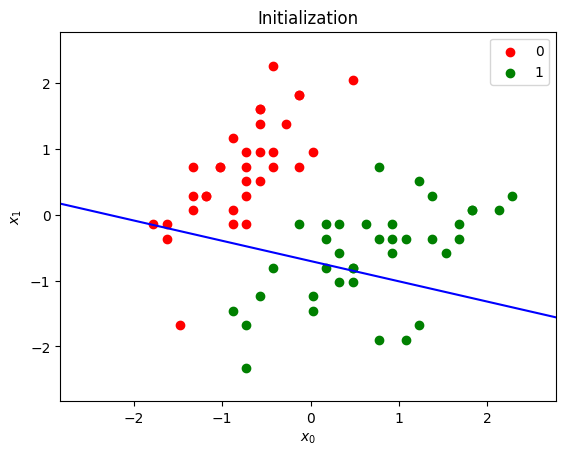


Epoch 0

Iteration 0
--------------------
x: [-1.0280556   0.72748234], y: 0
v: 0.6934082412757296
y_out: 1
Error: -1
Weights: [0.20180001 0.61483395]
Bias: 0.42772773900711447

Iteration 1
--------------------
x: [-1.32853114  0.29036849], y: 0
v: 0.3381585497565798
y_out: 1
Error: -1
Weights: [0.21508532 0.61193026]
Bias: 0.41772773900711446

Iteration 2
--------------------
x: [0.77479765 0.72748234], y: 1
v: 1.0295437983085423
y_out: 1
Error: 0
Weights: [0.21508532 0.61193026]
Bias: 0.41772773900711446

Iteration 3
--------------------
x: [-0.42710452  0.72748234], y: 0
v: 0.7710322888366263
y_out: 1
Error: -1
Weights: [0.21935636 0.60465544]
Bias: 0.40772773900711445

Iteration 4
--------------------
x: [-0.72758006 -1.67664385], y: 1
v: -0.7656634036044404
y_out: 0
Error: 1
Weights: [0.21208056 0.587889  ]
Bias: 0.41772773900711446

Iteration 5
--------------------
x: [-0.12662898  1.82026698], y: 0
v: 1.4609871289962166
y_out: 1
Error: -1
Weights: [0.21334685 0.56968633]
Bias: 

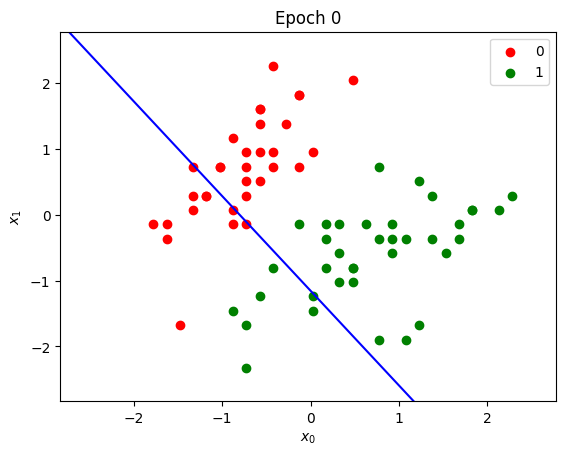


Epoch 1

Iteration 0
--------------------
x: [-1.0280556   0.72748234], y: 0
v: 0.0937704508342205
y_out: 1
Error: -1
Weights: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteration 1
--------------------
x: [-1.32853114  0.29036849], y: 0
v: -0.13345123404526127
y_out: 0
Error: 0
Weights: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteration 2
--------------------
x: [0.77479765 0.72748234], y: 1
v: 0.6872201709527865
y_out: 1
Error: 0
Weights: [0.34351715 0.2245225 ]
Bias: 0.2577277390071143

Iteration 3
--------------------
x: [-0.42710452  0.72748234], y: 0
v: 0.2743461649932556
y_out: 1
Error: -1
Weights: [0.34778819 0.21724767]
Bias: 0.2477277390071143

Iteration 4
--------------------
x: [-0.72758006 -1.67664385], y: 1
v: -0.3695629959561024
y_out: 0
Error: 1
Weights: [0.34051239 0.20048124]
Bias: 0.2577277390071143

Iteration 5
--------------------
x: [-0.12662898  1.82026698], y: 0
v: 0.5795383767231073
y_out: 1
Error: -1
Weights: [0.34177868 0.18227857]
Bias: 0.24

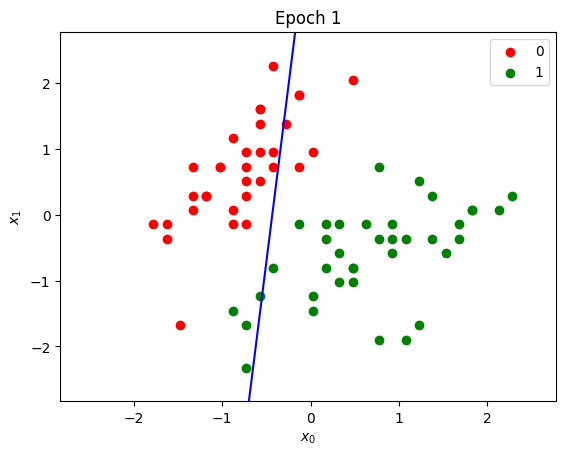


Epoch 2

Iteration 0
--------------------
x: [-1.0280556   0.72748234], y: 0
v: -0.2409015556274175
y_out: 0
Error: 0
Weights: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteration 1
--------------------
x: [-1.32853114  0.29036849], y: 0
v: -0.3353205988521888
y_out: 0
Error: 0
Weights: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteration 2
--------------------
x: [0.77479765 0.72748234], y: 1
v: 0.41478163246420785
y_out: 1
Error: 0
Weights: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteration 3
--------------------
x: [-0.42710452  0.72748234], y: 0
v: -0.02234049293020887
y_out: 0
Error: 0
Weights: [ 0.36369194 -0.03399912]
Bias: 0.15772773900711423

Iteration 4
--------------------
x: [-0.72758006 -1.67664385], y: 1
v: -0.04988283959773149
y_out: 0
Error: 1
Weights: [ 0.35641614 -0.05076556]
Bias: 0.16772773900711424

Iteration 5
--------------------
x: [-0.12662898  1.82026698], y: 0
v: 0.030188250876646117
y_out: 1
Error: -1
Weights: [ 0.35768242 -0

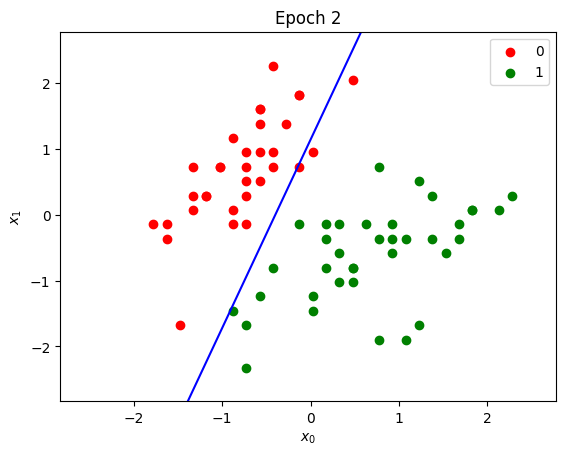


Epoch 3

Iteration 0
--------------------
x: [-1.0280556   0.72748234], y: 0
v: -0.3049351907071842
y_out: 0
Error: 0
Weights: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteration 1
--------------------
x: [-1.32853114  0.29036849], y: 0
v: -0.35590906531672184
y_out: 0
Error: 0
Weights: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteration 2
--------------------
x: [0.77479765 0.72748234], y: 1
v: 0.3173939352256029
y_out: 1
Error: 0
Weights: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteration 3
--------------------
x: [-0.42710452  0.72748234], y: 0
v: -0.09749214872958845
y_out: 0
Error: 0
Weights: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteration 4
--------------------
x: [-0.72758006 -1.67664385], y: 1
v: 0.08889838536754616
y_out: 1
Error: 0
Weights: [ 0.34519123 -0.12067256]
Bias: 0.1377277390071142

Iteration 5
--------------------
x: [-0.12662898  1.82026698], y: 0
v: -0.1256397436889416
y_out: 0
Error: 0
Weights: [ 0.34519123 -0.1206725

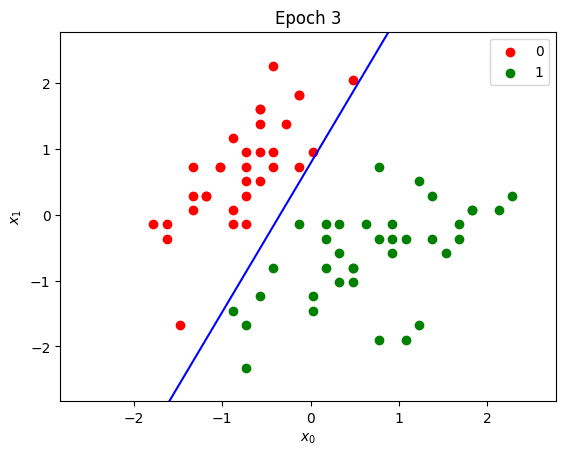


Epoch 4

Iteration 0
--------------------
x: [-1.0280556   0.72748234], y: 0
v: -0.3415305367771743
y_out: 0
Error: 0
Weights: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteration 1
--------------------
x: [-1.32853114  0.29036849], y: 0
v: -0.3779610003603502
y_out: 0
Error: 0
Weights: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteration 2
--------------------
x: [0.77479765 0.72748234], y: 1
v: 0.27182162579035696
y_out: 1
Error: 0
Weights: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteration 3
--------------------
x: [-0.42710452  0.72748234], y: 0
v: -0.13707981592133045
y_out: 0
Error: 0
Weights: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteration 4
--------------------
x: [-0.72758006 -1.67664385], y: 1
v: 0.12256675629685211
y_out: 1
Error: 0
Weights: [ 0.34021192 -0.15052119]
Bias: 0.11772773900711421

Iteration 5
--------------------
x: [-0.12662898  1.82026698], y: 0
v: -0.1993416976052742
y_out: 0
Error: 0
Weights: [ 0.34021192 -0.15

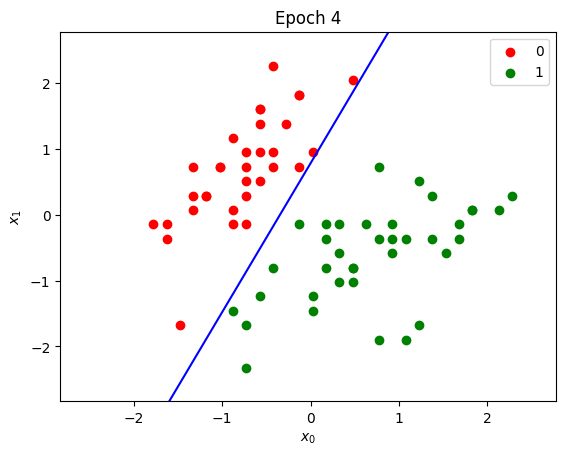

In [10]:
# Defines hyperparameters and initial settings
# -----------------------------------------------
# Maximum number of epochs.
max_iter = 40

# Learning rate
learning_rate = 0.01

# Sets a value for the random number generation seed.
np.random.seed(1234)

# Training the model
fit(X, y)

## Bibliografia
---

* GONZALEZ, R.C.; WOODS, R.E. Digital Image Processing. 3rd ed. Pearson, 2007.